# Data Science Hands-on

**First day**     

The goal of this notebook is:
- Explore houses dataset
- Make some plots to check different variables
- Select interesting features to apply ML algorithms
- Fill missing values
- Transform some features to more informative variables


[Pandas cheatsheet](https://github.com/creyesp/houses-project/blob/add-binder-configs/pandas_cheatsheet.md)


## What are some questions that I can answer with this dataset?
Understand your dataset is the first step of any data science project. You need to know the limitations and make a list of possible questions that could be answered with this dataset. These questions can reduce, expand or modify the scope of our project.

examples: 
- We could have great ideas but poor data
- We could have incorrect question for our dataset

**Data**: 
- We have a set of features of houses for sale in a specific time windows.  

**Business question/objective**:
- **New infocasas functionality**: Is it possible to offer an estimated price for selling given house characteristics (uploaded by owner in the webpage) without asking an appraiser? 


# Exploratory data analysis
- How many rows are in our dataset?
- How many columns are in our dataset?
- What data types are in the columns?
- Are there missing values in the dataset? Do we infer missing values? how?
- Are there outlier values? 

Data types:
- **Numeric**:
    - *Discrete*: variables that have finite possible values.
    - *Continuous*:  variables that can have an infinite number of possible values
- **Categorical, variables that have 2 or more possible values**:
    - *Ordinal*: these values have a meaningful order or rank. Ex. marks, A, B, C
    - *Nominal*: the order of those values have no meaning. Ex, names
- **Unstructured**:
    - *text*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom module
import handson

%matplotlib notebook

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None

## Load dataset


In [2]:
path_file = '../data/dataset_preprocessed.csv'

# Read csv file and assign to df variable
df = pd.read_csv(path_file)

In [3]:
# df = df[df['precio']<2e6]
# df.to_csv('../data/dataset_preprocessed.csv', index=False)

## General information about our dataset

In [4]:
# Check the name of columns (features)
df.columns

Index(['acepta_permuta', 'altura_permitida', 'ambientes', 'ambientes_extra',
       'ano_de_construccion', 'aptos_por_piso', 'banos', 'banos_extra',
       'barrio', 'cantidad_de_pisos', 'casco', 'descripcion', 'direccion',
       'disposicion', 'distancia_al_mar', 'dormitorios', 'dormitorios_extra',
       'estado', 'extra', 'financia', 'garajes', 'garajes_extra',
       'gastos_comunes', 'gastos_comunes_moneda', 'hectareas', 'huespedes',
       'inmobiliaria', 'longitud_frente', 'm2_de_la_terraza', 'm2_del_terreno',
       'm2_edificados', 'oficina', 'penthouse', 'piso', 'plantas',
       'plantas_extra', 'precio', 'precio_moneda', 'referencia', 'sobre',
       'tipo_de_publicacion', 'tipo_propiedad', 'titulo_publicacion', 'url',
       'vista_al_mar', 'vivienda_social'],
      dtype='object')

In [5]:
# Look at the first 5 rows of our dataset
df.head()

,acepta_permuta,altura_permitida,ambientes,ambientes_extra,ano_de_construccion,aptos_por_piso,banos,banos_extra,barrio,cantidad_de_pisos,casco,descripcion,direccion,disposicion,distancia_al_mar,dormitorios,dormitorios_extra,estado,extra,financia,garajes,garajes_extra,gastos_comunes,gastos_comunes_moneda,hectareas,huespedes,inmobiliaria,longitud_frente,m2_de_la_terraza,m2_del_terreno,m2_edificados,oficina,penthouse,piso,plantas,plantas_extra,precio,precio_moneda,referencia,sobre,tipo_de_publicacion,tipo_propiedad,titulo_publicacion,url,vista_al_mar,vivienda_social
0,nan,nan,nan,nan,nan,nan,3.00,1.00,centro,nan,nan,dueno vende: hermoso apartamento muy amplio so...,"barrios amorin 1279, centro",al frente,nan,3.00,0.00,excelente estado,NaN,nan,nan,nan,4000.00,nan,nan,nan,sara,nan,nan,118.00,120.00,nan,nan,nan,1.00,0.00,200000.00,nan,CE250,otros,venta,apartamentos,"barrios amorin 1279, centro",https://www.infocasas.com.uy/barrios-amorn-127...,nan,nan
1,nan,nan,nan,nan,nan,nan,2.00,0.00,pocitos,nan,nan,casa en pocitos zona iglesia san juan bautista...,NaN,NaN,nan,3.00,0.00,NaN,garaje,nan,1.00,0.00,nan,nan,nan,nan,gerardo,nan,nan,nan,120.00,nan,nan,nan,nan,nan,315000.00,nan,1F407,NaN,venta,casas,casa pocitos 3 dormitorios/cochera (dueno),https://www.infocasas.com.uy/casa-pocitos-3-do...,nan,nan
2,nan,nan,nan,nan,nan,nan,nan,nan,centro,nan,nan,oficinas london vendecochera en 1er pisopadron...,NaN,NaN,nan,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,oficinas london,nan,nan,nan,nan,nan,nan,nan,nan,nan,16500.00,nan,FEA0C,NaN,venta,garaje o cocheras,cochera en centro (san jose y rio negro),https://www.infocasas.com.uy/cochera-en-centro...,nan,nan
3,nan,nan,nan,nan,1991.00,nan,1.00,0.00,punta carretas,nan,nan,av.sarmiento y luis franzini. edificio de cate...,NaN,contrafrente,nan,1.00,0.00,excelente estado,"terraza,se aceptan mascotas,lavadero,barbacoa,...",nan,nan,nan,5000.00,nan,nan,nan,casagrande,nan,nan,nan,45.00,nan,nan,nan,1.00,0.00,150000.00,nan,45F92,NaN,venta,apartamentos,apartamento - punta carretas. impecable!,https://www.infocasas.com.uy/apartamento-punta...,nan,nan
4,nan,nan,nan,nan,2007.00,nan,3.00,1.00,pocitos nuevo,nan,nan,casa pocitos 3 dormitorios (1 en suite) 3 bano...,haedo 2929,NaN,1000.00,3.00,0.00,excelente estado,"wifi,patio,parrillero,garaje,calefaccion,aire ...",nan,1.00,0.00,nan,nan,nan,nan,juan jose,nan,nan,155.00,125.00,nan,nan,nan,2.00,0.00,329000.00,nan,556CB,NaN,venta,casas,cas pocitos 3 dorm (1 sui) 3 ban gge excl pati...,https://www.infocasas.com.uy/cas-pocitos-3-dor...,nan,nan


In [6]:
# Get number of rows and columns
df.shape

(26029, 46)

In [7]:
# Get data types of columns
df.dtypes

acepta_permuta           float64
altura_permitida         float64
ambientes                float64
ambientes_extra          float64
ano_de_construccion      float64
aptos_por_piso           float64
banos                    float64
banos_extra              float64
barrio                    object
cantidad_de_pisos        float64
casco                    float64
descripcion               object
direccion                 object
disposicion               object
distancia_al_mar         float64
dormitorios              float64
dormitorios_extra        float64
estado                    object
extra                     object
financia                 float64
garajes                  float64
garajes_extra            float64
gastos_comunes           float64
gastos_comunes_moneda    float64
hectareas                float64
huespedes                float64
inmobiliaria              object
longitud_frente          float64
m2_de_la_terraza         float64
m2_del_terreno           float64
m2_edifica

In [8]:
# Check if there are missing values in each column
df.isnull().any()

acepta_permuta            True
altura_permitida          True
ambientes                 True
ambientes_extra           True
ano_de_construccion       True
aptos_por_piso            True
banos                     True
banos_extra               True
barrio                    True
cantidad_de_pisos         True
casco                     True
descripcion               True
direccion                 True
disposicion               True
distancia_al_mar          True
dormitorios               True
dormitorios_extra         True
estado                    True
extra                     True
financia                  True
garajes                   True
garajes_extra             True
gastos_comunes            True
gastos_comunes_moneda     True
hectareas                 True
huespedes                 True
inmobiliaria              True
longitud_frente           True
m2_de_la_terraza          True
m2_del_terreno            True
m2_edificados             True
oficina                   True
penthous

In [9]:
# Get percentage of missing values from each column
df.isnull().sum() / df.shape[0] * 100

acepta_permuta           96.54
altura_permitida         98.87
ambientes                89.40
ambientes_extra          89.40
ano_de_construccion      38.46
aptos_por_piso           75.66
banos                     4.59
banos_extra               4.59
barrio                    0.34
cantidad_de_pisos        75.11
casco                    99.92
descripcion               0.66
direccion                64.93
disposicion              27.64
distancia_al_mar         80.35
dormitorios              12.05
dormitorios_extra        12.05
estado                    2.94
extra                    19.00
financia                 83.73
garajes                  58.82
garajes_extra            58.82
gastos_comunes           53.49
gastos_comunes_moneda   100.00
hectareas                99.81
huespedes               100.00
inmobiliaria              0.26
longitud_frente          98.63
m2_de_la_terraza         72.60
m2_del_terreno           66.75
m2_edificados             7.66
oficina                  87.82
penthous

In [10]:
# Get number of unique values for each feature
df.nunique()

acepta_permuta               1
altura_permitida            26
ambientes                    7
ambientes_extra              2
ano_de_construccion        141
aptos_por_piso              43
banos                        3
banos_extra                  2
barrio                      89
cantidad_de_pisos           38
casco                        1
descripcion              24893
direccion                 6543
disposicion                  4
distancia_al_mar             7
dormitorios                  6
dormitorios_extra            2
estado                       7
extra                    13724
financia                     1
garajes                     19
garajes_extra                2
gastos_comunes             886
gastos_comunes_moneda        0
hectareas                   19
huespedes                    1
inmobiliaria              1011
longitud_frente             83
m2_de_la_terraza           247
m2_del_terreno            1169
m2_edificados              781
oficina                      1
penthous

In [11]:
# Get 10 largest values of some feature
df['precio'].nlargest(10)

2709    1950000.00
4427    1950000.00
6087    1950000.00
6462    1950000.00
11069   1950000.00
13703   1950000.00
16303   1950000.00
19104   1950000.00
22388   1950000.00
23309   1950000.00
Name: precio, dtype: float64

## Statistic resume
### Numeric variables
Look at statistic info for each columns and check which columns has unusual behavior. 
- Are all positive values?
- is standard deviation different to zero?
- How long is percentil 75 from max?


In [12]:
# Get a resume of numerical columns from our dataset
df.describe()

,acepta_permuta,altura_permitida,ambientes,ambientes_extra,ano_de_construccion,aptos_por_piso,banos,banos_extra,cantidad_de_pisos,casco,distancia_al_mar,dormitorios,dormitorios_extra,financia,garajes,garajes_extra,gastos_comunes,gastos_comunes_moneda,hectareas,huespedes,longitud_frente,m2_de_la_terraza,m2_del_terreno,m2_edificados,oficina,penthouse,piso,plantas,plantas_extra,precio,precio_moneda,vista_al_mar,vivienda_social
count,901.00,293.00,2759.00,2759.00,16019.00,6336.00,24834.00,24834.00,6478.00,20.00,5114.00,22893.00,22893.00,4234.00,10718.00,10718.00,12105.00,0.00,50.00,1.00,356.00,7133.00,8655.00,24036.00,3170.00,420.00,9331.00,18753.00,18753.00,26029.00,0.00,1447.00,1899.00
mean,1.00,16.40,2.26,0.10,1988.48,5.47,1.65,0.19,8.51,1.00,422.27,2.28,0.05,1.00,1.67,0.09,826104915608793251840.00,nan,3331.60,6.00,38.84,26.42,230.61,118.42,1.00,1.00,1207.78,1.31,0.08,282713.99,nan,1.00,1.00
std,0.00,10.55,1.65,0.30,58.41,100.58,0.78,0.39,26.72,0.00,352.24,1.21,0.21,0.00,4.93,0.29,90890313858193310089216.00,nan,11159.21,nan,90.91,54.16,229.62,115.81,0.00,0.00,115029.51,0.61,0.27,266116.87,nan,0.00,0.00
min,1.00,5.00,1.00,0.00,1060.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,nan,1.00,6.00,1.00,1.00,-61.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,nan,1.00,1.00
25%,1.00,9.00,1.00,0.00,1963.00,2.00,1.00,0.00,4.00,1.00,100.00,2.00,0.00,1.00,1.00,0.00,2200.00,nan,3.00,6.00,10.00,4.00,62.00,53.00,1.00,1.00,1.00,1.00,0.00,129500.00,nan,1.00,1.00
50%,1.00,13.00,2.00,0.00,1998.00,3.00,1.00,0.00,10.00,1.00,300.00,2.00,0.00,1.00,1.00,0.00,4000.00,nan,5.00,6.00,15.00,10.00,140.00,76.00,1.00,1.00,3.00,1.00,0.00,185000.00,nan,1.00,1.00
75%,1.00,21.00,3.00,0.00,2017.00,5.00,2.00,0.00,10.00,1.00,500.00,3.00,0.00,1.00,2.00,0.00,8800.00,nan,18.00,6.00,28.50,27.00,348.00,139.00,1.00,1.00,6.00,1.00,0.00,330000.00,nan,1.00,1.00
max,1.00,135.00,7.00,1.00,7880.00,8000.00,3.00,1.00,2101.00,1.00,1000.00,5.00,1.00,1.00,127.00,1.00,10000000000000000905969664.00,nan,50000.00,6.00,880.00,953.00,999.00,998.00,1.00,1.00,11111111.00,3.00,1.00,1950000.00,nan,1.00,1.00


In [13]:
# Get percentile 5 and 95
df.quantile([0.05, 0.95])

,acepta_permuta,altura_permitida,ambientes,ambientes_extra,ano_de_construccion,aptos_por_piso,banos,banos_extra,cantidad_de_pisos,casco,distancia_al_mar,dormitorios,dormitorios_extra,financia,garajes,garajes_extra,gastos_comunes,gastos_comunes_moneda,hectareas,huespedes,longitud_frente,m2_de_la_terraza,m2_del_terreno,m2_edificados,oficina,penthouse,piso,plantas,plantas_extra,precio,precio_moneda,vista_al_mar,vivienda_social
0.05,1.00,7.00,1.00,0.00,1932.00,1.00,1.00,0.00,2.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,nan,1.45,6.00,9.00,2.00,1.40,32.00,1.00,1.00,0.00,1.00,0.00,76000.00,nan,1.00,1.00
0.95,1.00,31.00,6.00,1.00,2019.00,10.00,3.00,1.00,13.00,1.00,1000.00,4.00,0.00,1.00,3.00,1.00,23000.00,nan,30000.00,6.00,152.50,100.00,749.30,350.00,1.00,1.00,10.00,3.00,1.00,840000.00,nan,1.00,1.00


### Categeries resume

In [14]:
# Get a resume of no numerical columns from our dataset. 
# Hint: use include='O' as argument in resume function
df.describe(include='O')

,barrio,descripcion,direccion,disposicion,estado,extra,inmobiliaria,referencia,sobre,tipo_de_publicacion,tipo_propiedad,titulo_publicacion,url
count,25941,25856,9128,18835,25264,21084,25961,26024,8127,26029,25931,26028,26029
unique,89,24893,6543,4,7,13724,1011,26019,3,1,12,21394,26024
top,pocitos,"torre 25, es un edificio ubicado proximo a la ...",26 de marzo,al frente,buen estado,garaje,las torres,F8736,otros,venta,apartamentos,apartamento en venta 2 dormitorios,https://www.infocasas.com.uy/amplio-monoambien...
freq,4104,12,55,15688,10413,985,1024,2,4412,26029,17060,170,2


In [15]:
df['extra']

0                                                      NaN
1                                                   garaje
2                                                      NaN
3        terraza,se aceptan mascotas,lavadero,barbacoa,...
4        wifi,patio,parrillero,garaje,calefaccion,aire ...
5        placard en dormitorio,placard en cocina,garaje...
6                                                      NaN
7        terraza,se aceptan mascotas,sauna,lavadero,cal...
8                                                      NaN
9                 lavadero,jardin,aire acondicionado,rejas
10                                                     NaN
11                                                     NaN
12                                      aire acondicionado
13                                                  garaje
14                                                     NaN
15                                      aire acondicionado
16       terraza,lavadero,balcon,ascensor,agua caliente.


## Visualization
[Seaborn](https://seaborn.pydata.org/) is a very useful package to make EDA (built on [Matplotlib](https://matplotlib.org/)), it's a statistical data visualization package and it's easy to create univarible and bivarible plots.
<img src="img/seaborn.png" />

### Univarible plots
- [Distribution](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot)
- [Histograms](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot)
- [Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)


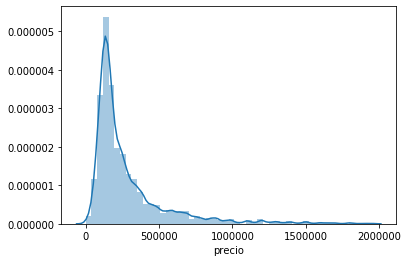

In [16]:
# Plot price distribution
f, ax = plt.subplots()
sns.distplot(df['precio'].dropna(), ax=ax)

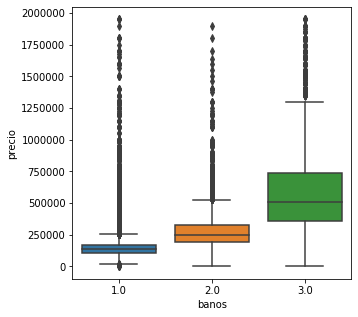

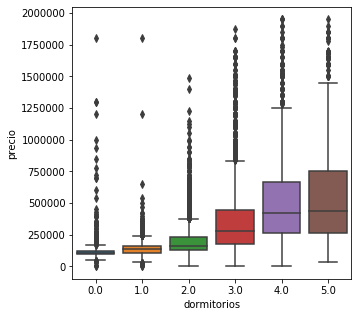

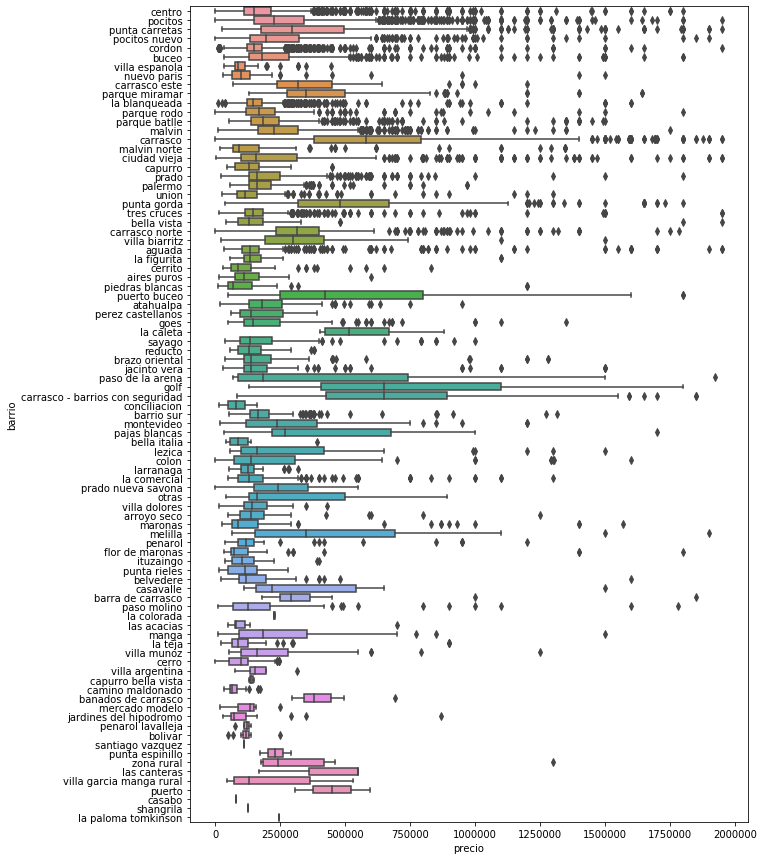

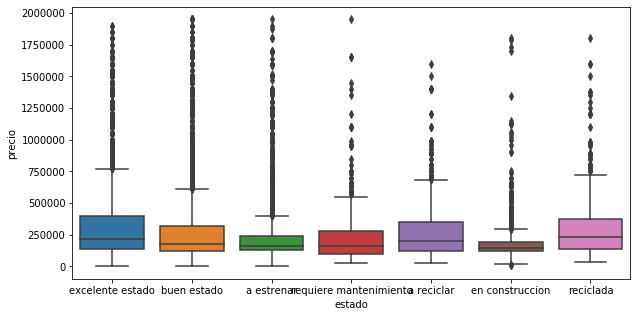

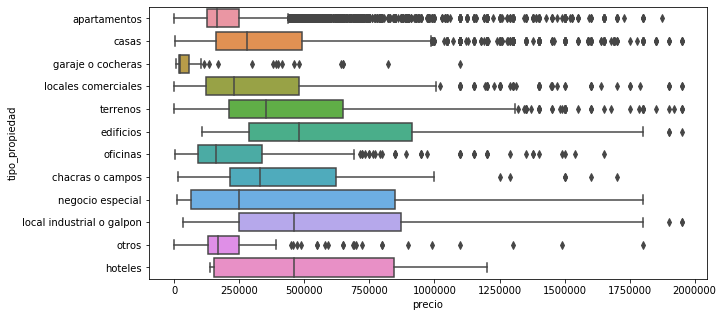

In [17]:
# Plot boxplots of price group by some categorical feature 
# ex. estado, barrio, banos, dormitorios, tipo_propiedad
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x='banos', y='precio', data=df)

f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x='dormitorios', y='precio', data=df)

f, ax = plt.subplots(figsize=(10, 15))
sns.boxplot(y='barrio', x='precio', orient='h', data=df)

f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='estado', y='precio', data=df, ax=ax)

f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(y='tipo_propiedad', x='precio', orient='h', data=df)

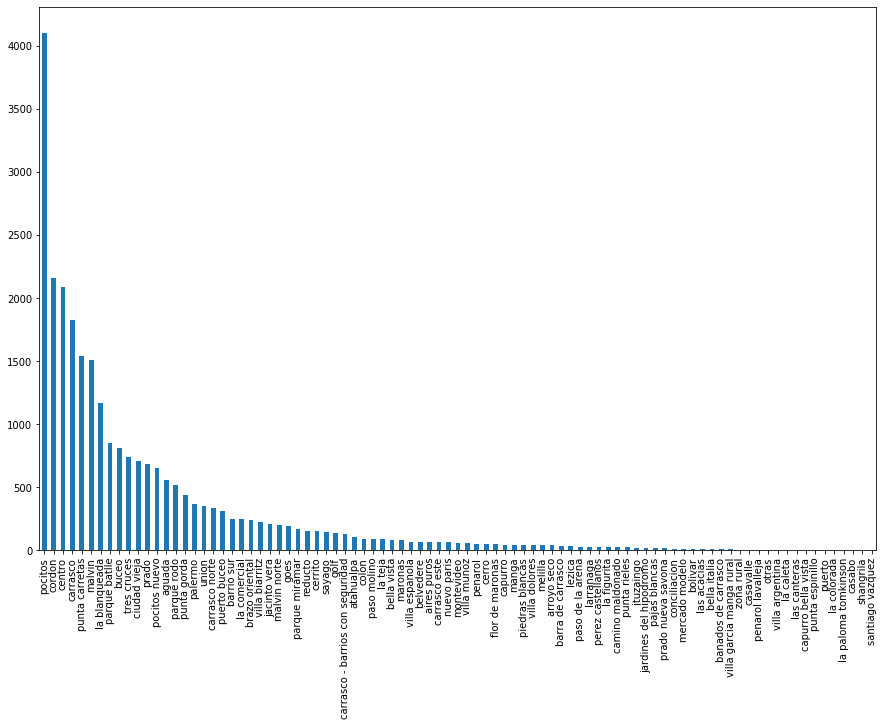

In [18]:
# Plot histogram of barrio feature
f, ax = plt.subplots(figsize=(15,10))
df['barrio'].value_counts().plot(kind='bar', ax=ax)


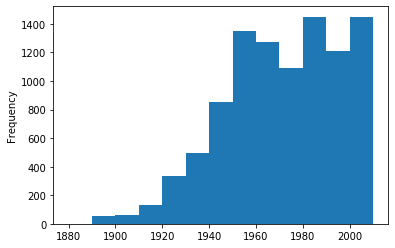

In [19]:
# Make a histogram of "ano_de_construccion" between 1880 and 2019, in bins of 10 years
f, ax = plt.subplots()
df['ano_de_construccion'].plot.hist(bins=np.arange(1880, 2020, 10), ax=ax)

### bivarible plots
- [Scatter](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)
- [Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot)
- [Relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

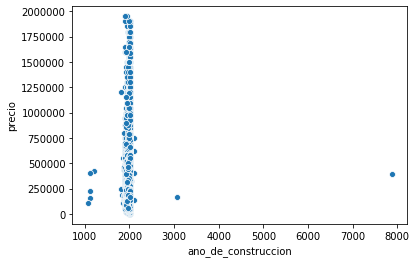

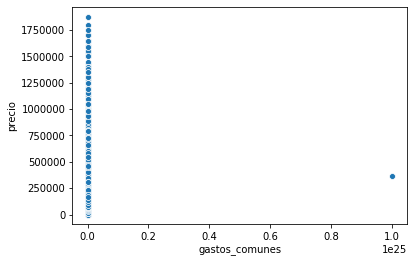

In [20]:
# make scatter plot, ex ano_de_construccion and precio, or gastos_comunes vs precio
f, ax = plt.subplots()
sns.scatterplot(x='ano_de_construccion', y='precio', data=df, ax=ax)

f, ax = plt.subplots()
sns.scatterplot(x='gastos_comunes', y='precio', data=df, ax=ax)

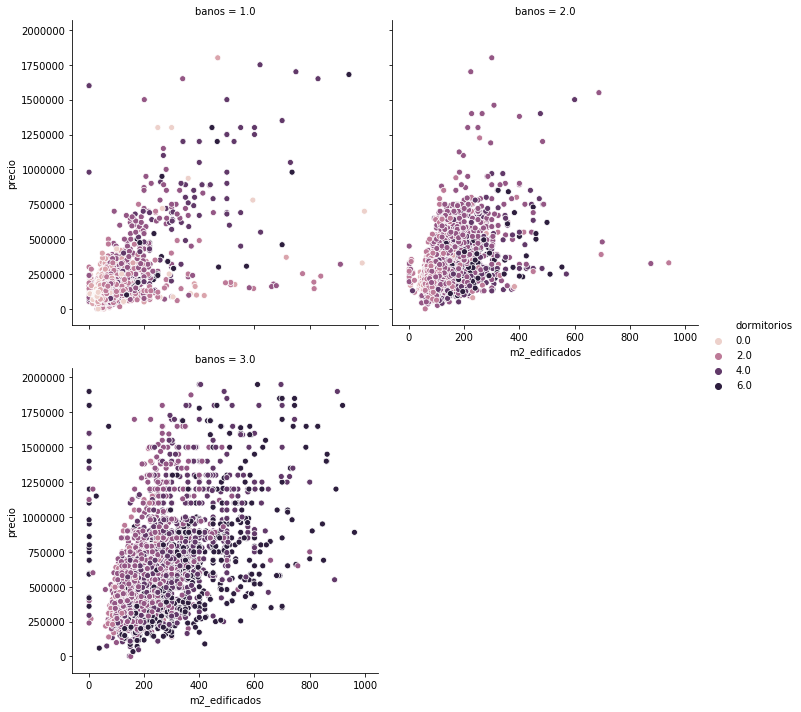

In [21]:
# Make a relplot using for example m2_edificados, precio, banos, dormitorios
sns.relplot(
    x="m2_edificados", 
    y="precio",
    col="banos",
    col_wrap=2,
    hue='dormitorios',
    data=df,
)

/home/cesar/software/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/cesar/software/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


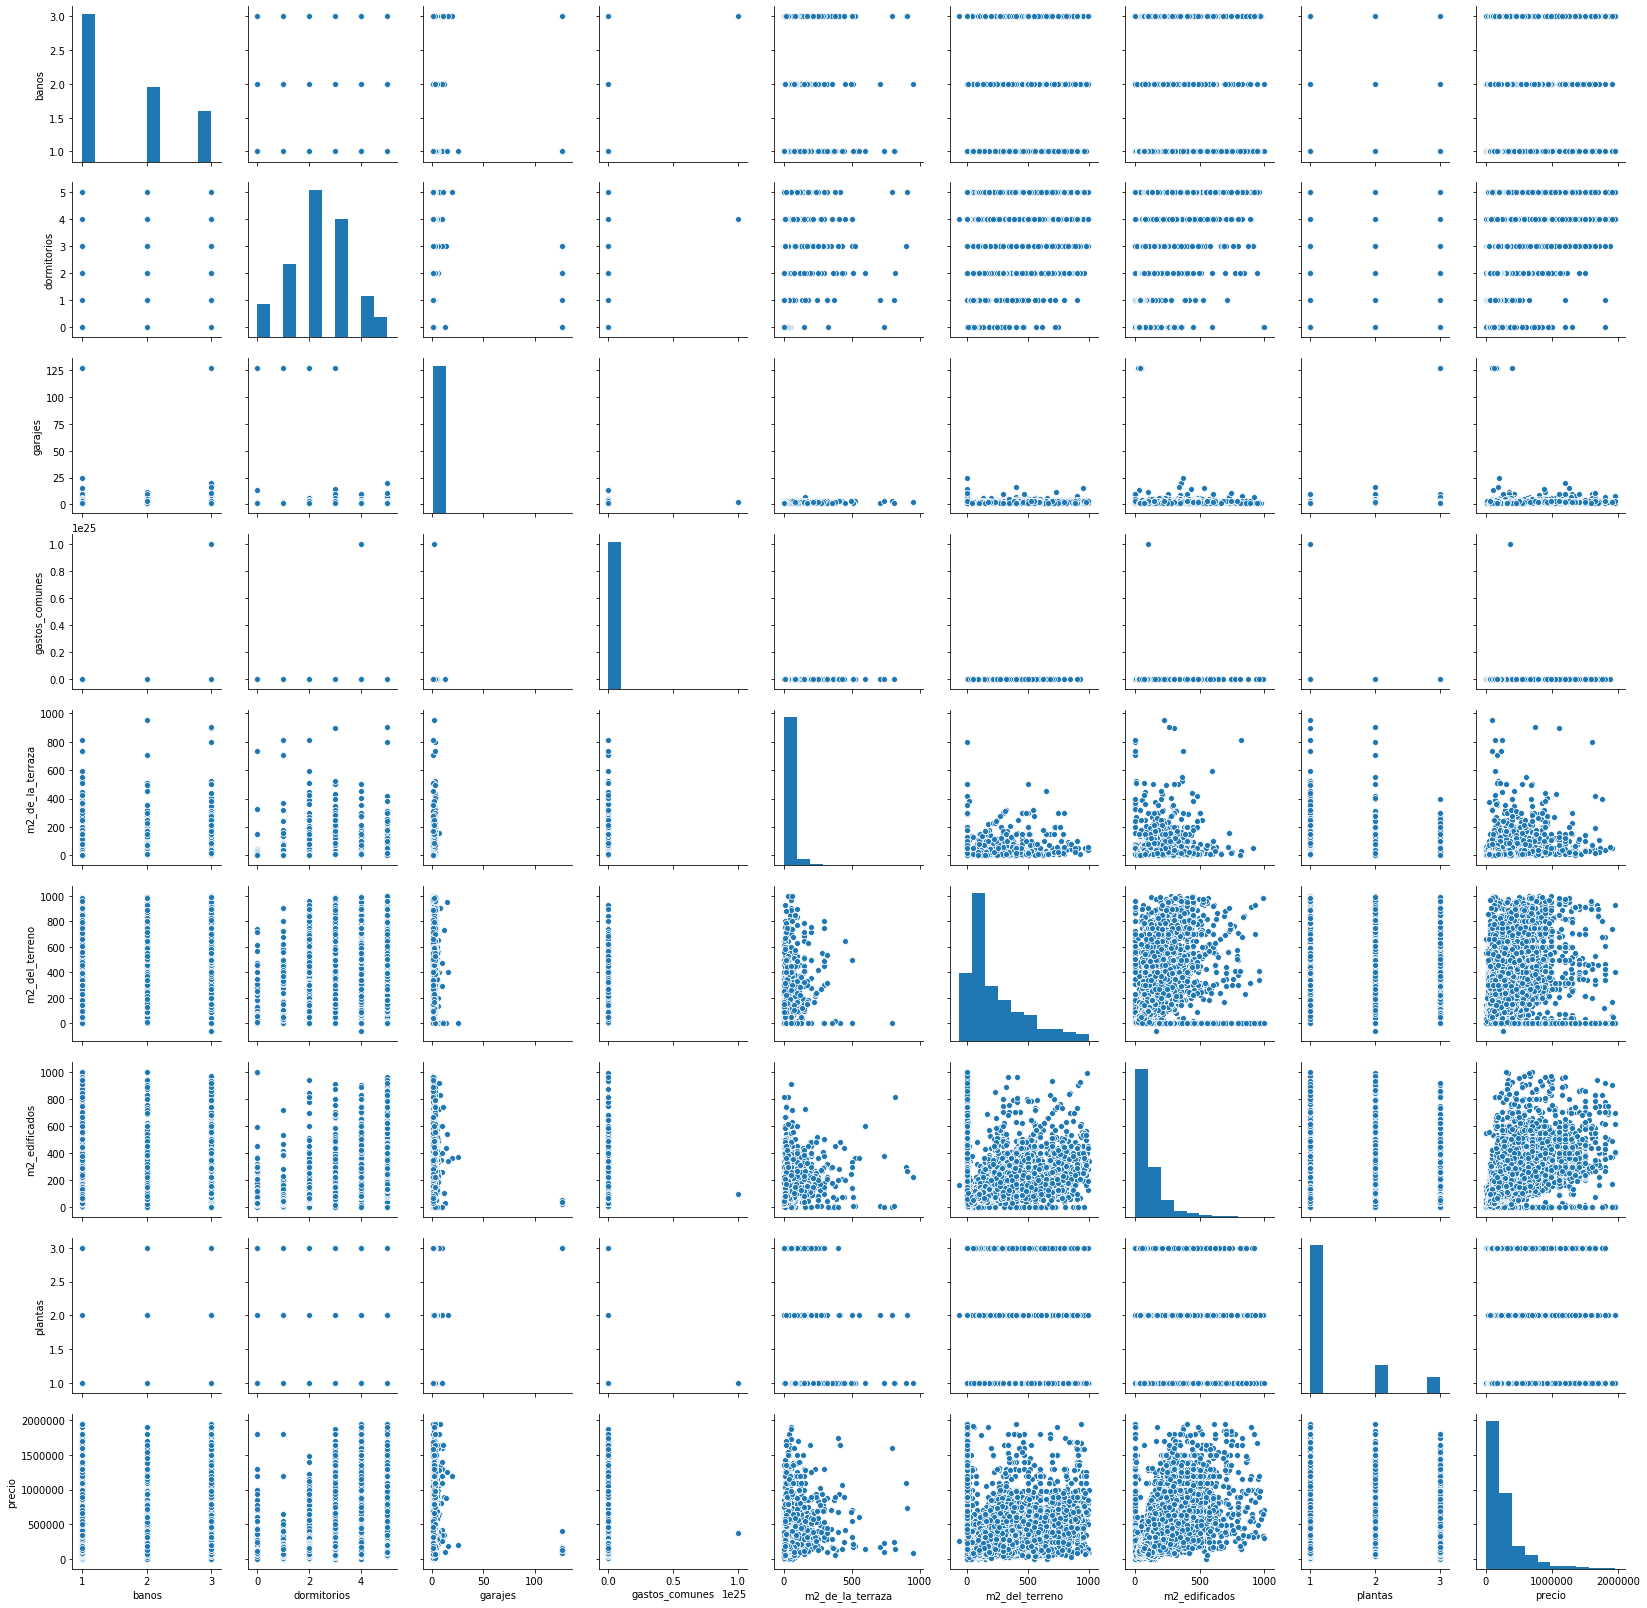

In [22]:
# Select continuous feature and make a pairplot
features = [
    'banos',
    'dormitorios',
    'garajes',
    'gastos_comunes',
    'm2_de_la_terraza',
    'm2_del_terreno',
    'm2_edificados',
    'plantas',
    'precio',
]
sns.pairplot(df[features]);

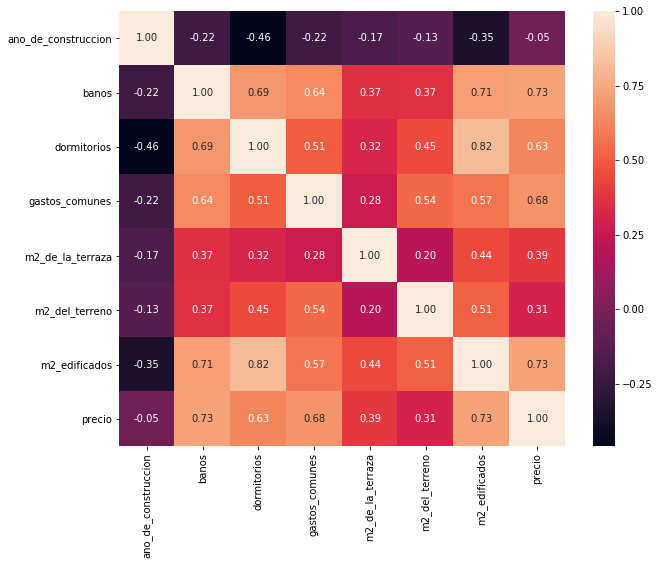

In [23]:
# Select continuous feature, compute correlations between them and make a heatmap
features = [
    'ano_de_construccion',
    'banos',
    'dormitorios',
    'gastos_comunes',
    'm2_de_la_terraza',
    'm2_del_terreno',
    'm2_edificados',
    'precio',
]
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df[features].corr(method='spearman'), annot=True, fmt='.02f', ax=ax)

# Data preparation

**"The quality and quantity of data that you gather will directly determine how good your predictive model can be."**

- Select relevant features
- Clean and Missing values imputation




<table>
  <tr>
    <th>Feature selection</th>
    <th>Filling missing values</th>
  </tr>
  <tr>
    <th><img src="http://dkopczyk.quantee.co.uk/wp-content/uploads/2018/10/feat_sel-600x265.png" /></th>
    <th><img src="https://i.stack.imgur.com/E4mhD.png" /></th>
</table>


## Select feature for analysis
Check dataset [documentation](https://github.com/creyesp/houses-project/blob/add-binder-configs/data/dataset_description.md) to choose the most interesting feature to answer our questions.

In [24]:
columns_to_analyze = [
    'ano_de_construccion', 
    'banos',
    'banos_extra',
    'descripcion',
    'disposicion',
    'distancia_al_mar',
    'dormitorios',
    'dormitorios_extra',
    'estado',
    'extra',
    'garajes',
    'garajes_extra',
    'gastos_comunes',
    'tipo_de_publicacion',
    'm2_de_la_terraza',
    'm2_del_terreno',
    'm2_edificados',
    'oficina',
    'penthouse',
    'plantas',
    'plantas_extra',
    'precio',
    'sobre',
    'tipo_propiedad',
    'vista_al_mar',
    'vivienda_social',
    'barrio', 
]

## Split dataset in numerical and string variables
Pandas has a method to split dataset group by dtypes:
- **'object'**: To select strings you must use the object dtype
- **'number'**: To select all numeric types
- **'category'**: To select Pandas categorical dtypes
- **'datetime'**: To select datetimes
- **'timedelta'**: To select timedeltas

In [25]:
df[columns_to_analyze].dtypes

ano_de_construccion    float64
banos                  float64
banos_extra            float64
descripcion             object
disposicion             object
distancia_al_mar       float64
dormitorios            float64
dormitorios_extra      float64
estado                  object
extra                   object
garajes                float64
garajes_extra          float64
gastos_comunes         float64
tipo_de_publicacion     object
m2_de_la_terraza       float64
m2_del_terreno         float64
m2_edificados          float64
oficina                float64
penthouse              float64
plantas                float64
plantas_extra          float64
precio                 float64
sobre                   object
tipo_propiedad          object
vista_al_mar           float64
vivienda_social        float64
barrio                  object
dtype: object

In [26]:
df_num = df[columns_to_analyze].select_dtypes(include='number')
df_obj = df[columns_to_analyze].select_dtypes(include='object')

print('Numerical columns: {}\n'.format(df_num.columns.tolist()))
print('Caterorial columns: {}'.format(df_obj.columns.tolist()))

Numerical columns: ['ano_de_construccion', 'banos', 'banos_extra', 'distancia_al_mar', 'dormitorios', 'dormitorios_extra', 'garajes', 'garajes_extra', 'gastos_comunes', 'm2_de_la_terraza', 'm2_del_terreno', 'm2_edificados', 'oficina', 'penthouse', 'plantas', 'plantas_extra', 'precio', 'vista_al_mar', 'vivienda_social']

Caterorial columns: ['descripcion', 'disposicion', 'estado', 'extra', 'tipo_de_publicacion', 'sobre', 'tipo_propiedad', 'barrio']


## Missing values imputation
There are more sophisticated method to make missing imputation like [Iterative Imputer](https://towardsdatascience.com/4-tips-for-advanced-feature-engineering-and-preprocessing-ec11575c09ea).

Some features have only 1 valid value and the rest of the values are Nan (Not a number), ex. "oficina" column. In this case we can infer that missing value is 0. 
- **Look at what features we can replace Nan values with 0**.

There are other features that nan values should be replacing with a specific value, ex. "plantas", if a house or apartment doesn't have a valid value then default value should be 1.
- **Look at what feature we can replace Nan values with specific values**.

In [27]:
# Fill missing values with zero
fill_zero_col = [
    'm2_de_la_terraza',
    'vivienda_social',
    'gastos_comunes',
    'garajes',
    'garajes_extra',
    'plantas_extra',
    'penthouse',
    'oficina',
    'vista_al_mar',
]
df_num.loc[:, fill_zero_col] = df_num[fill_zero_col].fillna(0)

# Fill missing values with 1
df_num['plantas'].fillna(1, inplace=True)

We can infer some values of a column from other column, for example we can fill nan values in "m2_del_terreno" from "m2_edificados".
- **Select nan values from  "m2_del_terreno" and fill it with "m2_edificados".**

In [28]:
# Fill missing value usings other columns
mask_m2_terreno = df_num['m2_del_terreno'].isna()
df_num.loc[mask_m2_terreno, 'm2_del_terreno'] = df_num.loc[mask_m2_terreno, 'm2_edificados']

Also we can use some statistical metrics to fill missing values, like mean, median, mode, etc.
- **Compute the median of "m2_edificados" and fill nan values with this result.**

In [29]:
df_num['m2_edificados'].fillna(df_num['m2_edificados'].median(), inplace=True)

For categorical feature we can add a new category to fill missing values
- **Replace nan values with a defaul category for following feature:**
    - "barrio"
    - "disposicion"
    - "tipo_propiedad"

In [30]:
# Fill missing categories
df_obj['barrio'].fillna('desconocido', inplace=True)
df_obj['disposicion'].fillna('otro', inplace=True)
df_obj['tipo_propiedad'].fillna('otros', inplace=True)

 ## Feature transformation
 

We can create new features applying some functions or filters to transform them and get a more informative features. Apply the following transformation:
- **Create a binary feature called "cerca_rambla" which is 1 when "distancia_al_mar" < 1000 or "vista_al_mar" is 1, in other case set it to 0.**
- **Create a feature called "m2_index" which is the ratio between "m2_edificados" and "m2_del_terreno"**
- **Create a binary feature called "es_casa" which is 1 if "tipo_propiedad" == 'casas' and 0 is "tipo_propiedad" == 'apartamentos'.**
- **Create a binary feature called "parrillero" if "extra" feature contain 'parrillero'**

In [31]:
df_num['cerca_rambla'] = (df_num['distancia_al_mar'] <= 1000) | (df_num['vista_al_mar'] ).astype(float)

df_num['m2_index'] = df_num['m2_edificados']/df_num['m2_del_terreno']

df_num['es_casa'] = df_obj['tipo_propiedad'].map({'casas':1, 'apartamentos': 0})

df_num['parrilero'] = df_obj['extra'].str.contains('parrillero').fillna(False)



### Binning
Some variables like years or ages is an example of a feature type that might benefit from transformation into a binning variable.

- **Create a new variable called decada that transform "ano_de_cosntruccion" to "decada". Use pd.cut()**

In [32]:
range_decade = np.arange(1880, 2021, 10)
range_label = np.arange(1880, 2020, 10)
year = df['ano_de_construccion'].copy()
year[year < 1880] = 1880
year[year > 2019] = 2019
year.fillna(1951, inplace=True)

df_num['decada'] = pd.cut(x=year,
                          bins=range_decade,
                          labels=range_label,
                          right=False,
                         ).astype(int)

Some categorical features are ordinal, then we can map them to a numerical values in a specific order
- **Create a dictionary with all possible values of "estado" feature and assign a numerical value, where min value is the worse status and the max value is the best status of properties. Then map these values to a "estado" feature.**


In [33]:
# Categorical transformation
map_status = {
    'en construccion': 3,
    'a estrenar': 3,
    'excelente estado': 3,
    'buen estado': 2,
    'reciclada': 2,
    'requiere mantenimiento': 1,
    'a reciclar': 0,
#     '': np.nan,
}
df_num['estado'] = df_obj['estado'].map(map_status)



One useful transformation is [80/20 rule or Pareto Rule](https://en.wikipedia.org/wiki/Pareto_principle), it's say that  for many events, roughly 80% of the effects come from 20% of the causes. In our case "barrio" feature has a similar behaviour.  
<img src="https://www.dansilvestre.com/wp-content/uploads/2017/12/DanSilvestre.com_-1.png" width="50%"/>

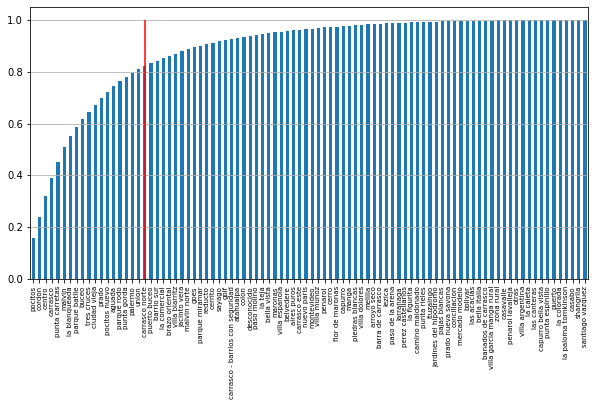

In [34]:
f, ax = plt.subplots(figsize=(10,5))
(df_obj['barrio'].value_counts().cumsum()/df_obj['barrio'].count()).plot(kind='bar', ax=ax)
ax.vlines(0.2*df_obj['barrio'].unique().shape[0], 0, 1, color='r')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize('x-small') 
ax.grid(axis='y')

Nominal features like "barrio" can be transformed into a numerical variable applying **ONE-HOT encoding**.
<img src="img/one-hot-encoding.png" />

- **Apply one-hot encoding on Pareto's transformation of "bario" feature and add prefix='ZN_', then assign to zona variable.**
- **Apply one-hot encoding on "disposicion" feature and add prefix='DISP_', then assign to zona disp.**


In [35]:
zona = pd.get_dummies(handson.pareto_rule(df_obj['barrio']), prefix='ZN_',)
zona.head()

,ZN__aguada,ZN__buceo,ZN__carrasco,ZN__centro,ZN__ciudad vieja,ZN__cordon,ZN__la blanqueada,ZN__malvin,ZN__otros,ZN__palermo,ZN__parque batlle,ZN__parque rodo,ZN__pocitos,ZN__pocitos nuevo,ZN__prado,ZN__punta carretas,ZN__punta gorda,ZN__tres cruces
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [36]:
disp = pd.get_dummies(df_obj['disposicion'], prefix='DISP_')
disp.head()

,DISP__al frente,DISP__contrafrente,DISP__interior,DISP__lateral,DISP__otro
0,1,0,0,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,0,1


Finally concatenate all new features and drop redundant 

In [37]:
df_num_final = pd.concat([df_num, zona, disp], axis=1)
drop_col = ['distancia_al_mar', 'vista_al_mar', 'm2_del_terreno', 'ano_de_construccion']
df_num_final.drop(columns=drop_col, inplace=True)

## Apply customs filters
- **Get percentile 5 and 95 or 1 and 99 to get a hint of posibles filter to get a clean dataset.**

In [38]:
df_num_final.quantile([0.05, 0.95])

,banos,banos_extra,dormitorios,dormitorios_extra,garajes,garajes_extra,gastos_comunes,m2_de_la_terraza,m2_edificados,oficina,penthouse,plantas,plantas_extra,precio,vivienda_social,cerca_rambla,m2_index,es_casa,parrilero,decada,estado,ZN__aguada,ZN__buceo,ZN__carrasco,ZN__centro,ZN__ciudad vieja,ZN__cordon,ZN__la blanqueada,ZN__malvin,ZN__otros,ZN__palermo,ZN__parque batlle,ZN__parque rodo,ZN__pocitos,ZN__pocitos nuevo,ZN__prado,ZN__punta carretas,ZN__punta gorda,ZN__tres cruces,DISP__al frente,DISP__contrafrente,DISP__interior,DISP__lateral,DISP__otro
0.05,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.00,0.00,0.00,1.00,0.00,76000.00,0.00,0.00,0.35,0.00,0.00,1940.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0.95,3.00,1.00,4.00,0.00,2.00,0.00,17000.00,40.00,340.00,1.00,0.00,3.00,1.00,840000.00,1.00,1.00,1.58,1.00,1.00,2010.00,3.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00


- Create a filter for following features to get :
  - tipo_propiedad
  - decada
  - oficina
  - penthouse
  - banos
  - dormitorios
  - garajes
  - m2_de_la_terraza
  - m2_edificados
  - gastos_comunes
  - precio
  - m2_index

In [39]:
mask = (
    df_obj['tipo_propiedad'].isin(['apartamentos', 'casas'])
    & (df_num_final['decada'].between(1880, 2019))
    & (df_num_final['oficina'] != 1)
    & (df_num_final['penthouse'] != 1) 
    & (df_num_final['banos'].between(1, 3))
    & (df_num_final['dormitorios'].between(0, 5))
    & (df_num_final['garajes'].between(0, 5))
    & (df_num_final['m2_de_la_terraza'].between(0, 400))
    & (df_num_final['m2_edificados'] >= 10)
    & (df_num_final['gastos_comunes'].between(0, 5e4))
    & (df_num_final['precio'].between(1e4, 2e6))
    & (df_num_final['m2_index'].between(0, 4))
)
mask.sum()

18106

## Drop no informative columns and drop missing row

In [40]:
zero_std_col = df_num_final.columns[df_num_final[mask].std() == 0]
df_final = df_num_final[mask].drop(columns=zero_std_col).astype(float).dropna()


In [41]:
handson.info(df_final)

,dtypes,isnull,%null,nunique
banos,float64,False,0.00,3
banos_extra,float64,False,0.00,2
dormitorios,float64,False,0.00,6
dormitorios_extra,float64,False,0.00,2
garajes,float64,False,0.00,6
garajes_extra,float64,False,0.00,2
gastos_comunes,float64,False,0.00,733
m2_de_la_terraza,float64,False,0.00,182
m2_edificados,float64,False,0.00,485
plantas,float64,False,0.00,3


In [42]:
df_final.describe()

,banos,banos_extra,dormitorios,dormitorios_extra,garajes,garajes_extra,gastos_comunes,m2_de_la_terraza,m2_edificados,plantas,plantas_extra,precio,vivienda_social,cerca_rambla,m2_index,es_casa,parrilero,decada,estado,ZN__aguada,ZN__buceo,ZN__carrasco,ZN__centro,ZN__ciudad vieja,ZN__cordon,ZN__la blanqueada,ZN__malvin,ZN__otros,ZN__palermo,ZN__parque batlle,ZN__parque rodo,ZN__pocitos,ZN__pocitos nuevo,ZN__prado,ZN__punta carretas,ZN__punta gorda,ZN__tres cruces,DISP__al frente,DISP__contrafrente,DISP__interior,DISP__lateral,DISP__otro
count,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00,18028.00
mean,1.62,0.17,2.24,0.03,0.60,0.03,3601.53,6.27,103.29,1.21,0.06,253683.74,0.07,0.20,0.94,0.23,0.31,1971.31,2.45,0.02,0.03,0.07,0.07,0.01,0.08,0.05,0.06,0.20,0.01,0.03,0.02,0.17,0.03,0.03,0.06,0.02,0.03,0.62,0.08,0.03,0.02,0.25
std,0.76,0.38,1.15,0.18,0.81,0.16,6486.65,21.57,84.20,0.53,0.23,216761.83,0.25,0.40,0.24,0.42,0.46,27.82,0.66,0.14,0.18,0.25,0.25,0.11,0.28,0.22,0.24,0.40,0.12,0.18,0.14,0.37,0.16,0.17,0.24,0.13,0.17,0.49,0.28,0.17,0.14,0.43
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,1.00,0.00,11250.00,0.00,0.00,0.05,0.00,0.00,1880.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,53.00,1.00,0.00,129000.00,0.00,0.00,1.00,0.00,0.00,1950.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,2.00,0.00,0.00,0.00,1.00,0.00,75.00,1.00,0.00,175500.00,0.00,0.00,1.00,0.00,0.00,1960.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
75%,2.00,0.00,3.00,0.00,1.00,0.00,4300.00,3.00,121.00,1.00,0.00,295000.00,0.00,0.00,1.00,0.00,1.00,2010.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
max,3.00,1.00,5.00,1.00,5.00,1.00,50000.00,400.00,941.00,3.00,1.00,1950000.00,1.00,1.00,4.00,1.00,1.00,2010.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## Save ready dataset 

In [43]:
df_final.to_csv('../data/dataset_ready.csv', index=False)